## Task 2

In [19]:
import pandas as pd
import numpy as np

In [6]:
dataset = pd.read_csv(r"D:\Internship\Datasets\titanic.csv")

In [7]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Task 3

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

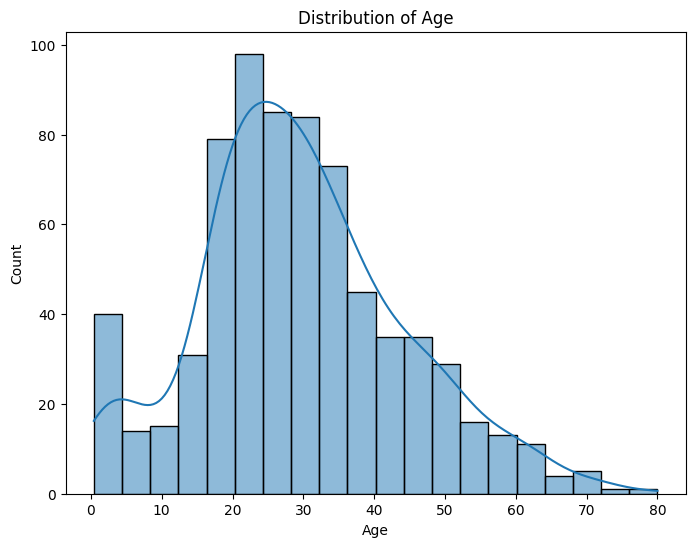

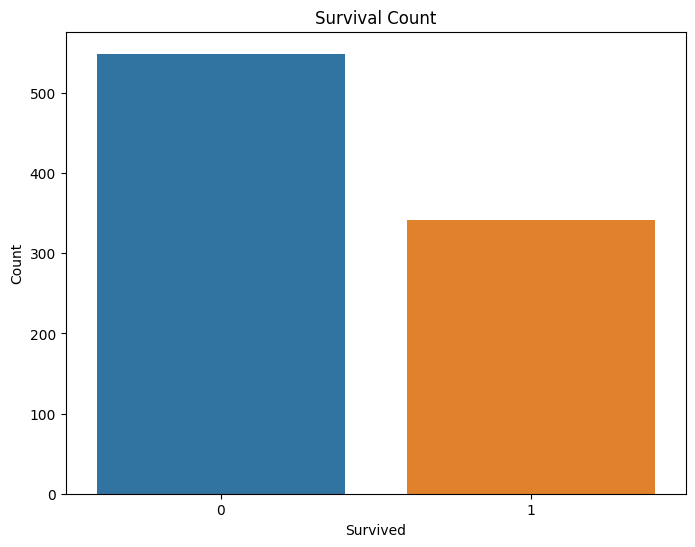

In [11]:
# Univariate Analysis
# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='age', kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Bar plot of Survival
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='survived')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

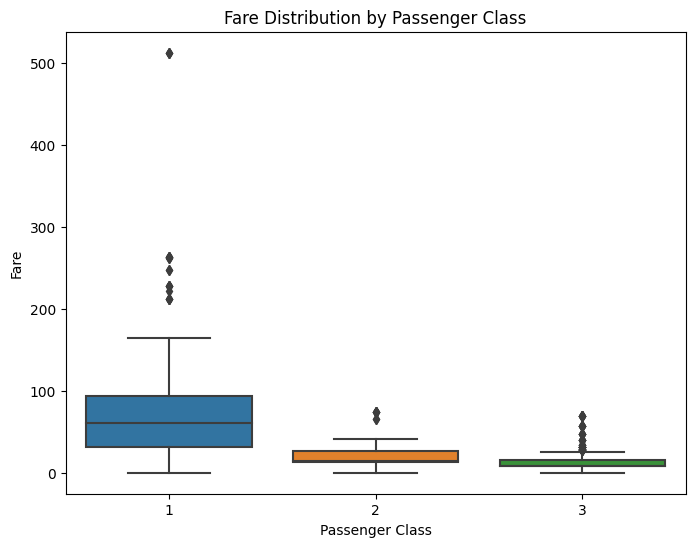

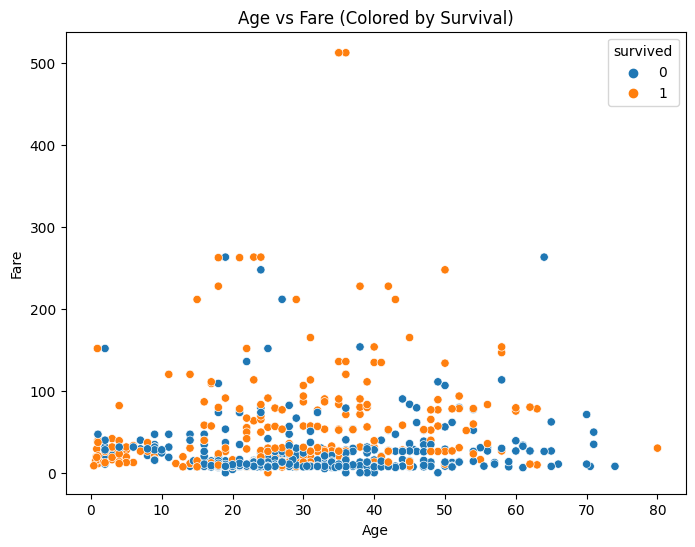

In [12]:
# Bivariate Analysis
# Box plot of Fare by Passenger Class (pclass)
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='pclass', y='fare')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

# Scatter plot of Age vs Fare colored by Survival
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x='age', y='fare', hue='survived')
plt.title('Age vs Fare (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

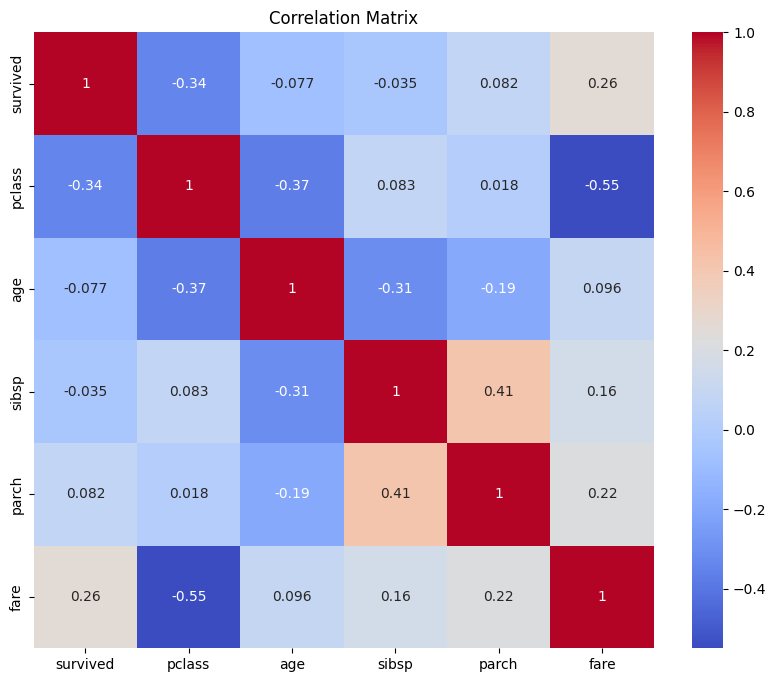

In [13]:
# Multivariate Analysis
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = dataset[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Task 4

In [16]:
# Descriptive statistics
descriptive_stats = dataset.describe(include='all')
print(descriptive_stats)

          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

## Task 5

In [17]:
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing Values:\n", missing_values)

# Impute missing values with mean
dataset['age'].fillna(dataset['age'].mean(), inplace=True)
dataset['fare'].fillna(dataset['fare'].mean(), inplace=True)
dataset['embarked'].fillna(dataset['embarked'].mode()[0], inplace=True)

# Verify if missing values are handled
missing_values_after_imputation = dataset.isnull().sum()
print("\nMissing Values after Imputation:\n", missing_values_after_imputation)


Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Missing Values after Imputation:
 survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


## Task 6

In [40]:
import numpy as np

# Function to detect and replace outliers using Z-score
def replace_outliers_zscore(data, column_name):
    column = data[column_name].copy()  # Create a copy of the column
    z_scores = (column - column.mean()) / column.std()
    threshold = 3
    outliers = np.abs(z_scores) > threshold
    column.loc[outliers] = column.mean()
    data[column_name] = column  # Update the original dataset with the modified column

# Find and replace outliers in the 'age' and 'fare' columns
replace_outliers_zscore(dataset, 'age')
replace_outliers_zscore(dataset, 'fare')
print("Modified Dataset:\n", dataset)


Modified Dataset:
      survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  adult_male deck  embark_town alive  alone  
0   

## Task 7

In [25]:
# Check for categorical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_columns)

# Perform one-hot encoding
encoded_dataset = pd.get_dummies(dataset, columns=categorical_columns)
print("\nEncoded Dataset:\n", encoded_dataset.to_string(line_width=10000))


Categorical Columns:
 Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')

Encoded Dataset:
      survived  pclass        age  sibsp  parch        fare  adult_male  alone  sex_female  sex_male  embarked_C  embarked_Q  embarked_S  class_First  class_Second  class_Third  who_child  who_man  who_woman  deck_A  deck_B  deck_C  deck_D  deck_E  deck_F  deck_G  embark_town_Cherbourg  embark_town_Queenstown  embark_town_Southampton  alive_no  alive_yes
0           0       3  22.000000      1      0    7.250000        True  False           0         1           0           0           1            0             0            1          0        1          0       0       0       0       0       0       0       0                      0                       0                        1         1          0
1           1       1  38.000000      1      0   71.283300       False  False           1         0           1           0           0            1        

## Task 8

In [26]:
# Split the data into dependent and independent variables
X = dataset.drop('survived', axis=1)  # Independent variables (features)
y = dataset['survived']  # Dependent variable (target)

# Print the independent variables
print("Independent Variables (X):\n", X.head())

# Print the dependent variable
print("\nDependent Variable (y):\n", y.head())


Independent Variables (X):
    pclass     sex   age  sibsp  parch     fare embarked  class    who  \
0       3    male  22.0      1      0   7.2500        S  Third    man   
1       1  female  38.0      1      0  71.2833        C  First  woman   
2       3  female  26.0      0      0   7.9250        S  Third  woman   
3       1  female  35.0      1      0  53.1000        S  First  woman   
4       3    male  35.0      0      0   8.0500        S  Third    man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  
1       False    C    Cherbourg   yes  False  
2       False  NaN  Southampton   yes   True  
3       False    C  Southampton   yes  False  
4        True  NaN  Southampton    no   True  

Dependent Variable (y):
 0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


## Task 9

In [33]:
from sklearn.preprocessing import StandardScaler

# Perform one-hot encoding for categorical columns
encoded_dataset = pd.get_dummies(dataset, columns=categorical_columns)

# Split the data into independent (X) and dependent (y) variables
X = encoded_dataset.drop('survived', axis=1)
y = encoded_dataset['survived']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the independent variables (X)
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame (optional)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Print the scaled independent variables
print("Scaled Independent Variables (X_scaled):\n", X_scaled.head())


Scaled Independent Variables (X_scaled):
      pclass       age     sibsp     parch      fare  adult_male     alone  \
0  0.827377 -0.592704  0.432793 -0.473674 -0.738441    0.811922 -1.231645   
1 -1.566107  0.695087  0.432793 -0.473674  2.114784   -1.231645 -1.231645   
2  0.827377 -0.270757 -0.474545 -0.473674 -0.708364   -1.231645  0.811922   
3 -1.566107  0.453626  0.432793 -0.473674  1.304564   -1.231645 -1.231645   
4  0.827377  0.453626 -0.474545 -0.473674 -0.702794    0.811922  0.811922   

   sex_female  sex_male  embarked_C  ...    deck_C    deck_D    deck_E  \
0   -0.737695  0.737695   -0.482043  ... -0.266296 -0.196116 -0.193009   
1    1.355574 -1.355574    2.074505  ...  3.755222 -0.196116 -0.193009   
2    1.355574 -1.355574   -0.482043  ... -0.266296 -0.196116 -0.193009   
3    1.355574 -1.355574   -0.482043  ...  3.755222 -0.196116 -0.193009   
4   -0.737695  0.737695   -0.482043  ... -0.266296 -0.196116 -0.193009   

     deck_F    deck_G  embark_town_Cherbourg  emba

## Task 10

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Perform one-hot encoding for categorical columns
encoded_dataset = pd.get_dummies(dataset, columns=categorical_columns)

# Split the data into independent (X) and dependent (y) variables
X = encoded_dataset.drop('survived', axis=1)
y = encoded_dataset['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the independent variables (X) using the training set
X_train_scaled = scaler.fit_transform(X_train)

# Scale the independent variables (X) using the testing set
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print the scaled independent variables
print("Scaled Independent Variables for Training Set (X_train_scaled):\n", X_train_scaled.head())
print("Scaled Independent Variables for Testing Set (X_test_scaled):\n", X_test_scaled.head())

# Print the shapes of the training and testing sets
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)


Scaled Independent Variables for Training Set (X_train_scaled):
      pclass       age     sibsp     parch      fare  adult_male     alone  \
0 -1.614136  1.305518 -0.470722 -0.479342  0.229633    0.805076  0.812203   
1 -0.400551 -0.500438 -0.470722 -0.479342 -0.473803    0.805076  0.812203   
2  0.813034  0.221944 -0.470722 -0.479342 -0.704122    0.805076  0.812203   
3  0.813034 -0.259644  0.379923 -0.479342 -0.707335    0.805076 -1.231219   
4  0.813034 -1.864938  2.931860  2.048742  0.355571   -1.242118 -1.231219   

   sex_female  sex_male  embarked_C  ...    deck_C    deck_D    deck_E  \
0   -0.724310  0.724310   -0.461462  ...  3.562627 -0.165581 -0.186772   
1   -0.724310  0.724310   -0.461462  ... -0.280692 -0.165581 -0.186772   
2   -0.724310  0.724310   -0.461462  ... -0.280692 -0.165581 -0.186772   
3   -0.724310  0.724310   -0.461462  ... -0.280692 -0.165581 -0.186772   
4    1.380624 -1.380624   -0.461462  ... -0.280692 -0.165581 -0.186772   

     deck_F    deck_G  emba